In [40]:
import os.path
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from bayes_opt import BayesianOptimization
from sklearn import metrics
import pandas as pd

In [7]:
path = os.getcwd()

In [169]:
with open(path + '/data/OHE.pkl', 'rb') as file:
    OHE_train,OHE_val,OHE_test,feature_names_OHE = pickle.load(file)
with open(path + '/data/TFIDF.pkl', 'rb') as file:
    TFIDF_train,TFIDF_val,TFIDF_test,feature_names_TFIDF = pickle.load(file)
with open(path + '/data/BOG.pkl', 'rb') as file:
    BOG_train,BOG_val,BOG_test,feature_names_BOG = pickle.load(file)
with open(path + '/data/TECH.pkl', 'rb') as file:    
    TECH_train,TECH_val,TECH_test,feature_names_TECH = pickle.load(file)
with open(path + '/data/yTrainValTest.pkl', 'rb') as file:
        y_train,y_val,y_test= pickle.load(file) 
    

In [173]:
X_train = pd.DataFrame(np.hstack((OHE_train,TFIDF_train)), columns = list(feature_names_OHE)+list(feature_names_TFIDF))
X_val = pd.DataFrame(np.hstack((OHE_val,TFIDF_val)), columns = list(feature_names_OHE)+list(feature_names_TFIDF))
X_test = pd.DataFrame(np.hstack((OHE_test,TFIDF_test)), columns = list(feature_names_OHE)+list(feature_names_TFIDF))

In [174]:
#remove 'company' variables
cols = [c for c in X_train.columns if 'company_' not in c]

In [175]:
X_train = X_train[cols]
X_val = X_val[cols]
X_test = X_test[cols]
feature_names = cols

In [192]:
params = {'n_estimators':100, 'max_depth': 20}

In [193]:
# Create the model with 100 trees
model = RandomForestRegressor(**params)
# Fit on training data
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [194]:
len(y_val)

948

In [195]:
# Actual predictions
y_pred = model.predict(X_val)
# Probabilities for each class
feature_importances = model.feature_importances_

In [196]:
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('R2 Score:', np.sqrt(metrics.r2_score(y_val, y_pred)))

Mean Absolute Error: 15701.022917690636
Mean Squared Error: 489705792.9223042
Root Mean Squared Error: 22129.297162863175
R2 Score: 0.8189455630719187


In [181]:
features = pd.concat([pd.DataFrame(feature_names),pd.DataFrame(feature_importances)],axis = 1)
features.columns = ['feature','importance']

In [182]:
features.sort_values(by='importance', ascending = False).head(40)

,feature,importance
6,country_USA,0.482583
5317,role,0.121816
29,region_London,0.040332
473,analyst,0.020810
6066,team,0.020198
4918,python,0.015343
715,aws,0.014383
3704,machine,0.013297
5427,scientist,0.007797
3522,lead,0.006637


In [197]:
import matplotlib.pyplot as plt

In [199]:
error = y_pred-y_val

# need to run encodings seperately, drop companies, change parameters.

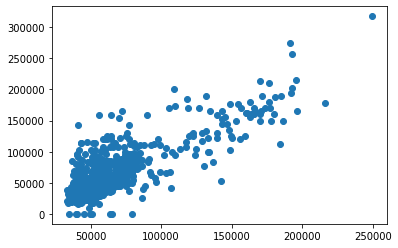

In [201]:
plt.scatter(y_pred,y_val)